<a href="https://colab.research.google.com/github/Tharunopi/PyTorch/blob/main/PyTorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PyTorch workflow
1.  Turn data into tensor
2.  Build or pick a pretrained model


```
2.1. Pick a loss function and optimizer
2.2. Build a training loop
```


3.   Fit the model to the data and make prediction
4.  Evalvate the model
5.   Improve through experimentation
6.Save and reload your trained model






In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cuda')

# **Creating dataset by using linear regression formula**

In [3]:
start, end, steps = 0, 1, 0.02
X = torch.arange(start, end, steps).unsqueeze(dim=1)
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [4]:
weight = 0.7
bias = 0.3
y = weight * X + bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

# **Splitting the data**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(len(X_train), len(y_test))

40 10


# **Visualizing the data**

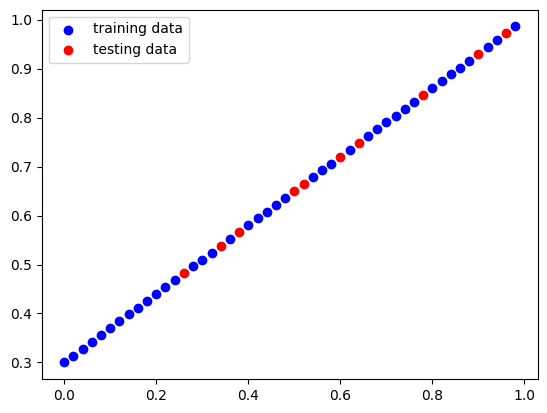

In [8]:
def visualize(train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test, prediction=None):
  plt.scatter(train_x, train_y, c='b', label='training data')
  plt.scatter(test_x, test_y, c='r', label='testing data')
  if prediction is not None:
    plt.scatter(test_x, prediction, c='g', label='prediction data')
  plt.legend()
  plt.show()

visualize()

# **Building PyTorch model**

In [9]:
#creating a linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # creating a forward method for computation
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [10]:
#checking contents of our model
# torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-0.2570], requires_grad=True),
 Parameter containing:
 tensor([-1.0404], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.2570])), ('bias', tensor([-1.0404]))])

In [12]:
with torch.inference_mode():
  y_pred = model_0(X_test)

print(y_pred)

tensor([[-1.1073],
        [-1.2409],
        [-1.1947],
        [-1.2718],
        [-1.1278],
        [-1.2872],
        [-1.1741],
        [-1.1690],
        [-1.2049],
        [-1.1381]])


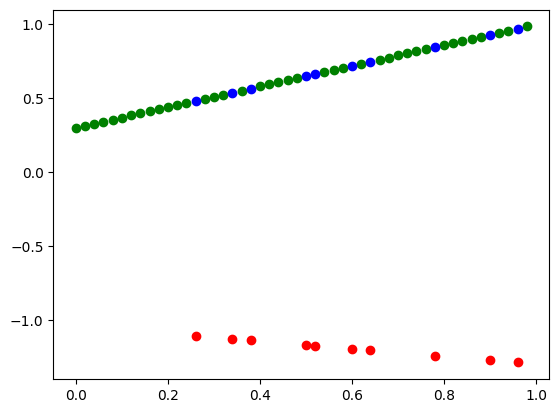

In [13]:
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_test, y_test, c='b')
plt.scatter(X_test, y_pred, c='r')
plt.show()

In [15]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)

# **Training loop**

0. Loop through the data
1. Forward pass to make predictions on data
2. Backward pass to move backwards to model to calculate gradients of the model to calculate loss.
3. use Optimizers to adjust the model parameters to reduce the loss.